In [1]:
import minerl
import gym
from minerl.data import BufferedBatchIter
import matplotlib.pyplot as plt
import numpy as np

C:\Users\mateu\AppData\Roaming\Python\Python39\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [2]:
data = minerl.data.make('MineRLObtainDiamond-v0')
iterator = BufferedBatchIter(data)

data2 = minerl.data.make('MineRLTreechop-v0')
iterator2 = BufferedBatchIter(data)

In [3]:
for test in iterator.buffered_batch_iter(batch_size=1024, num_epochs=1):
    print(len(test[0]['pov']))
    break
    
for test2 in iterator2.buffered_batch_iter(batch_size=1024, num_epochs=1):
    print(len(test[0]['pov']))
    break
    

100%|█████████████████████████████████████████████████████████████████████████| 69526/69526 [00:03<00:00, 21008.73it/s]


1024


100%|███████████████████████████████████████████████████████████████████████████| 7575/7575 [00:00<00:00, 27547.57it/s]


1024


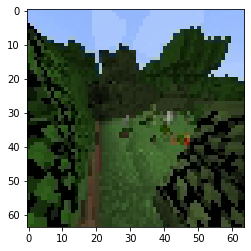

In [19]:
i = 10
plt.imshow(test[0]['pov'][i])

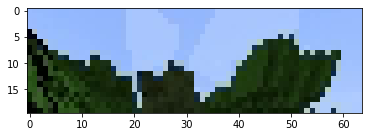

In [22]:
plt.imshow(test[0]['pov'][i][:20])

In [20]:
{k: v[i] for k, v in test[1].items()}

{'attack': 0,
 'back': 0,
 'camera': array([ 0.14999962, -1.7998047 ], dtype=float32),
 'craft': 'none',
 'equip': 'none',
 'forward': 1,
 'jump': 0,
 'left': 0,
 'nearbyCraft': 'none',
 'nearbySmelt': 'none',
 'place': 'none',
 'right': 0,
 'sneak': 0,
 'sprint': 0}

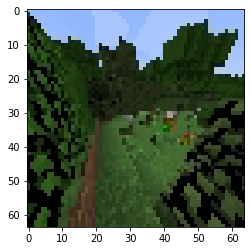

In [21]:
plt.imshow(test[3]['pov'][i])

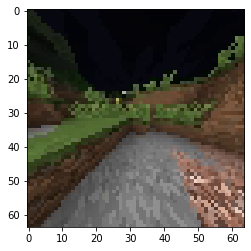

In [20]:
plt.imshow(test2[0]['pov'][i])

In [25]:
test[0]['pov'].shape

(1024, 64, 64, 3)

In [91]:
img = np.copy(test[0]['pov'][9])

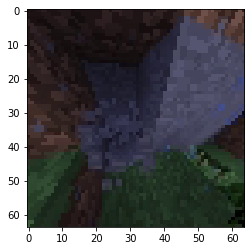

In [92]:
plt.imshow(img)

In [93]:
window_size = 8
n_tiles_per_axis = 8

img_mixed = img.reshape(n_tiles_per_axis, window_size, n_tiles_per_axis, window_size, 3)
img_mixed = img_mixed.swapaxes(1, 2).reshape(-1, window_size, window_size, 3)
np.random.shuffle(img_mixed)
img_mixed = img_mixed.reshape(n_tiles_per_axis, n_tiles_per_axis, window_size, window_size, 3).swapaxes(1, 2)
img_mixed = img_mixed.reshape(64, 64, 3)

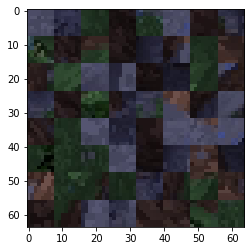

In [94]:
plt.imshow(img_mixed)

In [7]:
test = next(a)

100%|█████████████████████████████████████████████████████████████████████████| 29638/29638 [00:00<00:00, 30236.02it/s]


In [15]:
test[0]['pov'].shape

(32, 64, 64, 3)

In [28]:
test[1]

{'attack': array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64),
 'back': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 'camera': array([[  0.        ,   0.        ],
        [ -0.75      , -13.2       ],
        [  0.        ,   0.        ],
        [ -0.1500001 ,  -0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  1.2       ,   1.1999817 ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [ -0.15000153,   0.6000061 ],
        [ -6.1500015 ,   0.44999695],
        [  0.        ,   0.        ],
        [ -0.8999996 ,   0.8999977 ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.       

In [26]:
iterator.traj_sizes

[29638]

In [5]:
import torch

C:\Users\mateu\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
torch.arange(64).view(2, 32)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
         50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

In [107]:
torch.Tensor([False]).float()

torch.float32

In [96]:
import torch

C:\Users\mateu\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [138]:
t = torch.arange(0, n_tiles_per_axis, dtype=torch.long)
t1 = t.view(-1, 1).expand(n_tiles_per_axis, n_tiles_per_axis)
t2 = t.view(1, -1).expand(n_tiles_per_axis, n_tiles_per_axis)
target_arr = torch.stack([t1, t2], dim=2).view(-1, n_tiles_per_axis ** 2, 2).tile(256, 1, 1)

In [139]:
target_arr.shape

torch.Size([256, 64, 2])

In [156]:
pred_array = torch.zeros((256, 8, 64, 2))

In [157]:
torch.nn.CrossEntropyLoss()(pred_array, target_arr)

tensor(2.0794)

In [158]:
target_arr.shape

torch.Size([256, 64, 2])

In [160]:
target_arr[0, 2]

tensor([0, 2])

In [25]:
traj = list(data2.load_data(data2.get_trajectory_names()[0]))

100%|███████████████████████████████████████████████████████████████████████████| 2750/2750 [00:00<00:00, 59573.87it/s]


In [29]:
max_len = 3000

In [45]:
def process_single_action(action):
    disc_action_names = ['attack', 'back', 'forward', 'jump', 'left', 'right', 'sneak', 'sprint']
    disc_action = np.stack([action[name] for name in disc_action_names], axis=0)
    cont_action = action['camera'].astype(np.float32) / 180.
    return np.concatenate([disc_action, cont_action])    

In [63]:
def process_trajectory(traj):
    obss, actions, rewards, _, _ = zip(*traj)
    obss = np.stack([obs['pov'] for obs in obss])
    actions = np.stack([process_single_action(action) for action in actions])
    rtgs = np.cumsum(rewards[::-1])[::-1][:, None]
    return obss, actions, rtgs

In [64]:
obss, actions, rewards, _, _ = zip(*traj)

In [65]:
process_single_action(actions[0])

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00666666, -0.02666667])

In [66]:
test = process_trajectory(traj)

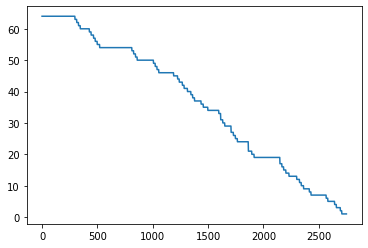

In [69]:
plt.plot(test[2])

In [70]:
test[2][-1]

array([1.], dtype=float32)

In [73]:
lens = []
for name in data2.get_trajectory_names():
    lens.append(len(list(data2.load_data(name))))

100%|██████████████████████████████████████████████████████████████████████████| 2139/2139 [00:00<00:00, 164508.15it/s]


100%|██████████████████████████████████████████████████████████████████████████| 3577/3577 [00:00<00:00, 170301.21it/s]


In [74]:
max(lens)

5678

In [85]:
import torch
from torch import nn

class PositionalEmbedding(nn.Module):
    def __init__(self, demb):
        super(PositionalEmbedding, self).__init__()

        self.demb = demb

        inv_freq = 1 / (10000 ** (torch.arange(0.0, demb, 2.0) / demb))
        self.register_buffer('inv_freq', inv_freq)

    def forward(self, pos_seq, bsz=None):
        sinusoid_inp = torch.ger(pos_seq, self.inv_freq)
        pos_emb = torch.cat([sinusoid_inp.sin(), sinusoid_inp.cos()], dim=-1)
        return pos_emb
        if bsz is not None:
            return pos_emb[:,None,:].expand(-1, bsz, -1)
        else:
            return pos_emb[:,None,:]

In [86]:
pe = PositionalEmbedding(128)

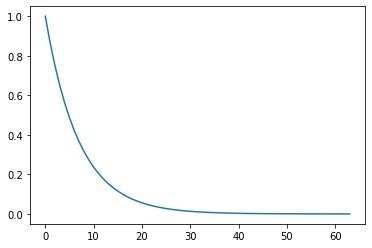

In [93]:
plt.plot(pe.inv_freq)

In [89]:
pembs = pe(torch.arange(0, 10000)).numpy()
pembs.shape

(10000, 128)

In [94]:
pembs[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [96]:
pembs[1]

array([8.4147096e-01, 7.6172042e-01, 6.8156135e-01, 6.0469401e-01,
       5.3316844e-01, 4.6794808e-01, 4.0930894e-01, 3.5711196e-01,
       3.1098360e-01, 2.7043223e-01, 2.3492107e-01, 2.0391227e-01,
       1.7689219e-01, 1.5338475e-01, 1.3295726e-01, 1.1522172e-01,
       9.9833421e-02, 8.6488239e-02, 7.4919149e-02, 6.4892538e-02,
       5.6204494e-02, 4.8677508e-02, 4.2157151e-02, 3.6509294e-02,
       3.1617507e-02, 2.7380774e-02, 2.3711514e-02, 2.0533808e-02,
       1.7781857e-02, 1.5398657e-02, 1.3334820e-02, 1.1547563e-02,
       9.9998331e-03, 8.6595351e-03, 7.4988720e-03, 6.4937710e-03,
       5.6233834e-03, 4.8696562e-03, 4.2169522e-03, 3.6517333e-03,
       3.1622725e-03, 2.7384162e-03, 2.3713715e-03, 2.0535237e-03,
       1.7782785e-03, 1.5399259e-03, 1.3335211e-03, 1.1547818e-03,
       9.9999993e-04, 8.6596422e-04, 7.4989413e-04, 6.4938160e-04,
       5.6234124e-04, 4.8696747e-04, 4.2169649e-04, 3.6517411e-04,
       3.1622779e-04, 2.7384196e-04, 2.3713738e-04, 2.0535249e

In [103]:
torch.tile(torch.tril(torch.ones((4, 4))), (3, 3))

tensor([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [99]:
torch.kron()

tensor([1., 1.])

In [108]:
test = torch.arange(0, 4).view(1, 4, 1)
test = torch.stack([test] * 3, dim=2)

In [109]:
test.view(1, 3 * 4, 1)

tensor([[[0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [2],
         [2],
         [2],
         [3],
         [3],
         [3]]])

In [5]:
env = gym.envs.make('MineRLTreechop-v0')

In [8]:
env.action_space.sample()['forward'].dtype

dtype('int32')